In [1]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K
import tensorflow as tf

from random import randrange

import numpy as np
import matplotlib.pyplot as plt
from os import path, getcwd, chdir

In [2]:
path = f"{getcwd()}/mnist.npz"
mnist = tf.keras.datasets.mnist
(X_train, Y_train), (X_test, Y_test) = mnist.load_data(path=path)

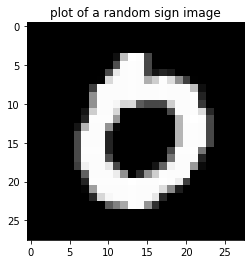

label of shown image is 0


In [3]:
r = randrange(X_train.shape[0])
plt.imshow(X_train[r], interpolation='nearest', cmap='gray')
plt.title('plot of a random sign image')
plt.show()
print('label of shown image is', Y_train[r])

In [4]:
print("X_train :",X_train.shape,
      "Y_train :",Y_train.shape,
     "\nX_test :",X_test.shape,
     "Y_test :",Y_test.shape)

X_train : (60000, 28, 28) Y_train : (60000,) 
X_test : (10000, 28, 28) Y_test : (10000,)


In [5]:
X_train = X_train.reshape(60000, 28, 28, 1)
X_train = X_train.astype('float32')/255.
X_test = X_test.reshape(10000, 28, 28, 1)
X_test = X_test.astype('float32')/255.
# K.clear_session()

In [6]:
input_img = Input(shape=(28, 28, 1))

x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
encoded = Conv2D(4, (1,1), activation='relu', padding='same', name='encoded_img')(x)

encoder = Model(input_img, encoded, name='encoder')
encoder.summary()

Model: "encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 8)           584       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 8)           0   

In [7]:
x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same', name='decoded_img')(x)

autoencoder = Model(input_img, decoded, name='autoencoder')
autoencoder.compile(optimizer='Adam', loss='binary_crossentropy')
autoencoder.summary()

Model: "autoencoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 8)           584       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 8)           

In [8]:
history = autoencoder.fit(X_train, X_train,
                epochs=50,
                batch_size=32,
                shuffle=True,
                validation_data=(X_test, X_test))

Epoch 1/50
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1666 - val_loss: 0.1273
Epoch 2/50
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1204 - val_loss: 0.1137
Epoch 3/50
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1115 - val_loss: 0.1082
Epoch 4/50
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1068 - val_loss: 0.1045
Epoch 5/50
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1041 - val_loss: 0.1035
Epoch 6/50
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1023 - val_loss: 0.1003
Epoch 7/50
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1011 - val_loss: 0.0990
Epoch 8/50
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1001 - val_loss: 0.0998
Epoch 9/50
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0992 - val_loss: 0.0978
Epoch 10/50
1875/1875 [==============================] - 14s 7ms/step - l

Training loss after 50 epochs: 0.0917


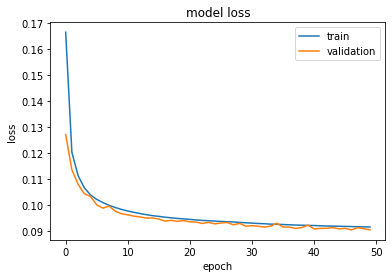

In [9]:
print('Training loss after 50 epochs: %.4f'%history.history['loss'][-1])
# plot the loss curves
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

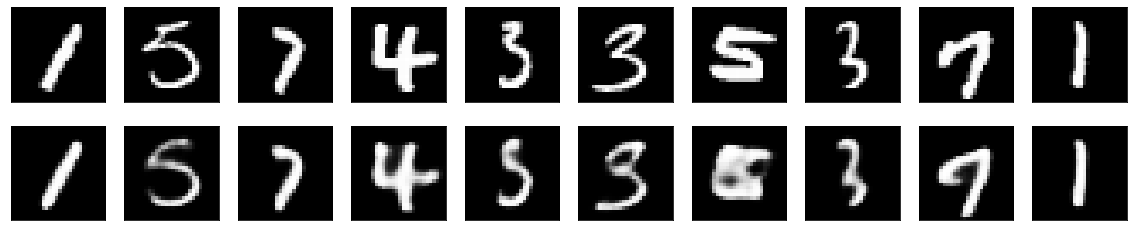

In [11]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
  r = randrange(X_test.shape[0])
  # display original
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(X_test[r].reshape(28, 28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
  # display reconstruction
  ax = plt.subplot(2, n, i +1 + n)
  plt.imshow(decoded_imgs[r].reshape(28, 28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

In [13]:
encoded_imgs = encoder.predict(X_test)
encoded_imgs.shape

(10000, 4, 4, 4)

## Let us try to explore how the neural network is actually encoding the numbers. The following illustrates how two instances of 5 and 3 instances of 7 are encoded and then decoded. Note that each encoding consists of 4 channels, each with 16 pixels. 

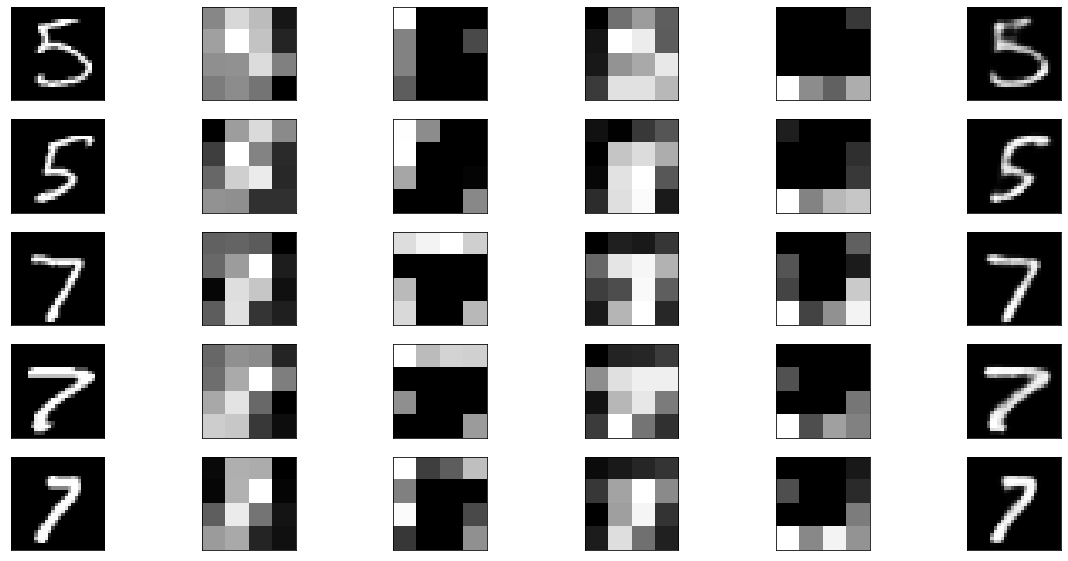

In [60]:
n = 5
I = [15, 23, 0, 4487, 8003]
plt.figure(figsize=(20, 10))
a = 1
for i in range(n):
  # display original
  ax = plt.subplot(n, 6, a)
  plt.imshow(X_test[I[i]].reshape(28, 28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
  a+=1
  # display encodings
  ax = plt.subplot(n, 6, a)
  plt.imshow(encoded_imgs[I[i],:,:,0])
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
  a+=1
  ax = plt.subplot(n, 6, a)
  plt.imshow(encoded_imgs[I[i],:,:,1])
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
  a+=1
  ax = plt.subplot(n, 6, a)
  plt.imshow(encoded_imgs[I[i],:,:,2])
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
  a+=1
  ax = plt.subplot(n, 6, a)
  plt.imshow(encoded_imgs[I[i],:,:,3])
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
  a+=1
  # display reconstruction
  ax = plt.subplot(n, 6, a)
  plt.imshow(decoded_imgs[I[i]].reshape(28, 28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
  a+=1
plt.show()